# A short notebook for averaging strike and dips for bedding corrections

In [1]:
import sys
#change to match where the PmagPy folder is on your computer
sys.path.insert(0, '/Users/Laurentia/PmagPy')
import pmag,pmagplotlib,ipmag # import PmagPy functions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mplstereonet
%matplotlib inline

First, we take the bedding measurements from the T21 stratagraphic section and put them in a table. These measurements were taken on individual planes and need to be averaged to derive an approximate tilt orientation for the entire T21 section.

In [63]:
#strike_dip = [[115,74],[112,63],[110,70],[107,72],[109,68]]
strike_dip = [[142,43],[141,44],[146,38],[157,44]]

In [64]:
bedding_data = pd.DataFrame(strike_dip,columns=['strike','dip'])

In [65]:
bedding_data['pole_trend'] = bedding_data['strike']-90
bedding_data['pole_plunge'] = 90 - bedding_data['dip']
bedding_data

,strike,dip,pole_trend,pole_plunge
0,142,43,52,47
1,141,44,51,46
2,146,38,56,52
3,157,44,67,46


The best way to take the average of planes is to calculate the poles to each plane and take a mean of that "Fisherian" distribution. The plane perpendicular to the mean is the best average of the measured bedding planes.

In [66]:
bedding_poles = ipmag.make_di_block(bedding_data['pole_trend'],bedding_data['pole_plunge'])
bedding_poles_mean = pmag.fisher_mean(bedding_poles)
bedding_poles_mean

{'alpha95': 6.5451733559630476,
 'csd': 5.7559825747271605,
 'dec': 56.524244565466176,
 'inc': 47.929627242372987,
 'k': 198.03004982070738,
 'n': 4,
 'r': 3.9848507839960847}

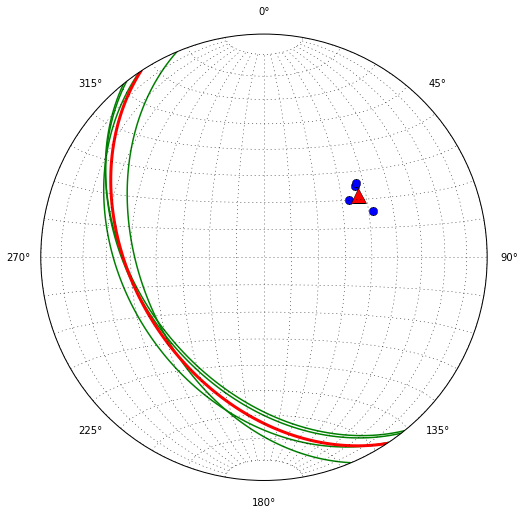

146.524244565 42.0703727576


In [67]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='stereonet')

mean_strike = bedding_poles_mean['dec'] + 90.0
mean_dip = 90.0 - bedding_poles_mean['inc']

ax.plane(bedding_data['strike'],bedding_data['dip'], 'g-', linewidth=1.5)
ax.pole(bedding_data['strike'],bedding_data['dip'], 'bo', markersize=8)
ax.plane(mean_strike,mean_dip, 'r-', linewidth=3)
ax.pole(mean_strike,mean_dip, 'r^', markersize=15)
ax.grid()

plt.show()
print mean_strike,mean_dip

In [62]:
pmag.dotilt(356.7,42.1,125,61)

(66.969641406893786, 46.654911073278015)